# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مشکل بیش‌برازش داده‌ها یا Overfitting و معرفی Dropout</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای اینکه موقع اجرای کدها دقیقا نتایج سر کلاس را بتوانید مشاهده کنید
:
</div>

In [4]:
import numpy as np
from keras.utils import np_utils

np.random.seed(123)  # for reproducibility

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه بدون Dropout</div>



2022-12-22 12:41:35.153377: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-22 12:41:35.189515: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-22 12:41:35.189561: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amirhossein): /proc/driver/nvidia/version does not exist
2022-12-22 12:41:35.190510: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 12:41:36.149468: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 

Test Accuracy: 0.9300000071525574 
Maximum Test Acuracy During Training:  0.9399999976158142


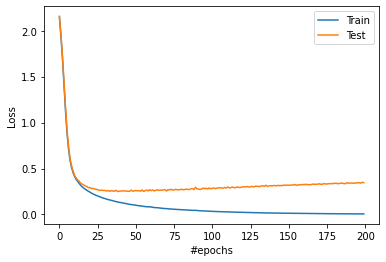

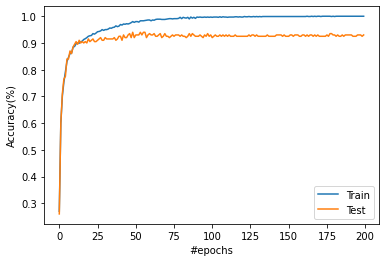

In [5]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.np_utils.to_categorical(y_train_original, num_classes=10)
y_test  = keras.utils.np_utils.to_categorical(y_test_original, num_classes=10)
# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>



Test Accuracy: 0.9200000166893005 
Maximum Test Acuracy During Training:  0.9449999928474426


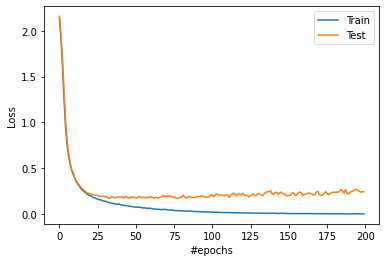

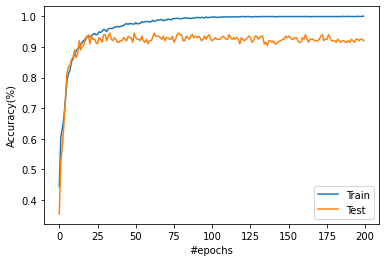

In [7]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.np_utils.to_categorical(y_train_original, num_classes=10)
y_test  = keras.utils.np_utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()